In [ ]:
!pip install tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: Operation cancelled by user


In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
from keras.models import load_model
from keras.optimizers import Adam

model_path = '/content/drive/MyDrive/Colab Notebooks/emotion_recognition/model/_mini_XCEPTION.102-0.66.hdf5'

# 모델 로드 (컴파일하지 않음)
model = load_model(model_path, compile=False)

# 사용자 정의 옵티마이저 설정
custom_optimizer = Adam(learning_rate=0.0001)

# 옵티마이저 재설정
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Emotion probabilities: 
Angry: 0.06
Disgust: 0.00
Fear: 0.06
Happy: 0.18
Sad: 0.02
Surprise: 0.66
Neutral: 0.01


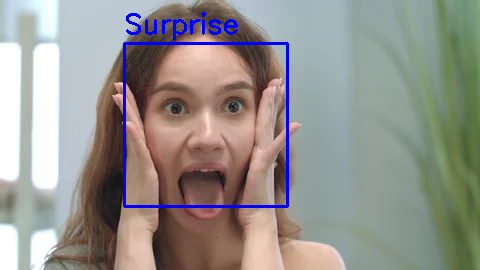

In [ ]:
## 이미지 출력하는 코드 추가임
import numpy as np
import cv2
from google.colab.patches import cv2_imshow #imshow 사용

def load_and_preprocess_image(image_path):
    # 이미지 로드
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 흑백 이미지로 변환
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(10, 10) # 박스 크기 제한(미리필터링)
    )

    for (x, y, w, h) in faces:
      # 평균, 표준편차 계산
      roi_mean, roi_stddev = cv2.meanStdDev(gray[y:y+h, x:x+w])

      if w < 100 or h < 100: # 필터링 안했을때 거침
        print(f"skip (box size: ({w}, {h}))")
      if roi_stddev[0][0] < 45:
        print(f"skip (stddev: {roi_stddev[0][0]:.2f})")
        continue

      # 얼굴 영역을 모델 입력 크기에 맞게 조정
      face_img = gray[y:y+h, x:x+w]
      face_img = cv2.resize(face_img, (64, 64))
      face_img = face_img / 255.0  # 픽셀 값을 [0, 1] 범위로 정규화
      face_img = face_img.reshape(1, 64, 64, 1)  # 배치 차원 추가

      # 감정 예측
      predictions = model.predict(face_img)
      predicted_class = np.argmax(predictions, axis=1)[0]
      # confidence = predictions[0][predicted_class] # 가장 높은 확률

      # # # 임계값 설정
      # # threshold = 0.4
      # # if confidence < threshold:
      # #   print(f"low confidence ({confidence:.2f}), Skip")
      # #   continue

      # 감정 라벨 설정
      emotion_label = emotion_dict[predicted_class]

      # 감정 클래스별 확률 출력
      print("Emotion probabilities: ")
      for i, prob in enumerate(predictions[0]):
        print(f"{emotion_dict[i]}: {prob:.2f}")

      # 얼굴 감지된 부분에 네모 표시 및 감정 출력
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      cv2.putText(img, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
      ## 임계값 설정시 밑
      # cv2.putText(img, f"{emotion_label} ({confidence:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return img


# OpenCV의 얼굴 검출기 로드 (얼굴 감지용 haarcascade 파일)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 감정 라벨 딕셔너리
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

# 이미지 로드 및 감정 분석 후 표시
image_path = '/content/drive/MyDrive/Colab Notebooks/emotion_recognition/assets/surprise.jpg'
processed_image = load_and_preprocess_image(image_path)

# 이미지 출력
#cv2.imshow("Emotion Detection", processed_image)
cv2_imshow(processed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [2]:
## 삭제

image_path = '/content/drive/MyDrive/Colab Notebooks/emotion_recognition/harry.jpg'  # 분석할 이미지 파일 경로

# 이미지 로드 및 전처리
processed_image = load_and_preprocess_image(image_path)

# 감정 예측
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=1)  # 예측된 클래스 인덱스

# 예측된 감정 출력
print(f'Predicted emotion class: {predicted_class[0]}')

NameError: name 'load_and_preprocess_image' is not defined

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 64, 64, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 62, 62, 8)      │             72 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 62, 62, 8)      │             32 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 62, 62, 8)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 60, 60, 8)      │            576 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 60, 60, 8)      │             32 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 60, 60, 8)      │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 60, 60, 16)     │            200 │ activation_2[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 16)     │             64 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 60, 60, 16)     │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 60, 60, 16)     │            400 │ activation_3[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 60, 60, 16)     │             64 │ separable_conv2d_2[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 16)     │            128 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 16)     │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 16)     │             64 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)          

 Total params: 58,423 (228.21 KB)

 Trainable params: 56,951 (222.46 KB)

 Non-trainable params: 1,472 (5.75 KB)